# Chaîne de masse-ressort

## LU2PY222 - CC - 28 février 2024 - 8h30 - Durée 4h00.

## Modèle
On considère une chaîne de $N+2$ masses $m$ numérotées de $0$ à $N+1$ et reliées entre elles par des ressorts de raideur $k$. Les masses $0$ et $N+1$ sont maintenues fixes et on applique une force $F \cos(\omega t)$, qui varie sinusoidalement en fonction du temps $t$, sur la masse $N$.

Après un régime transitoire, le déplacement de la masse $n$ par rapport à sa position d'équilibre est: $A_n \cos(\omega t)$ où $A_n$ est un réel positif ou négatif. Ainsi, les déplacements des masses sont synchronisées, mais chaque déplacement a une amplitude $A_n$ différente. Ce deplacement peut même s'inverser (en opposition de phase) lorsque l'amplitude $A_n$ est négative.

Les amplitudes $A_n$ des déplacements de chaque masse vérifient la relation de récurrence: $A_0=0$, $A_{N+1}=0$, $-m\omega^2 A_n=k(A_{n+1}+A_{n-1}-2A_n)$ pour $n$ de 1 à $N-1$ et $-m\omega^2 A_N=k(A_{N-1}-2A_N)+F$.

Pour résoudre le problème numériquement, on utilise $\sqrt{k/m}$ comme unité pour les pulsations, $F/k$ comme unité pour les amplitudes et on pose $A_n = A u_n$ et $u_1=1$. On en déduit que la suite d'éléments $u_n$ a pour relation de récurrence

$$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ $$


avec le facteur $A$ donné par $$A=\frac{1}{(2-\omega^2)u_N-u_{N-1}} \ \ \ .$$

## Travail demandé

**La notation prendra en compte la structure et le soin apporté au compte-rendu, les éléments de réflexions que vous apporterez pour répondre au problème, les explications de votre démarche, la syntaxe et la clarté (commentaires) du code produit. Vous apporterez un soin particulier aux graphiques produit.**

**RAPPEL IMPORTANT** : le compte-rendu est **personnel** et **original**. Toutes lignes de codes non-triviales partagées entre camarades seront sanctionnées. Vous avez accès au site JupyterHub pour composer (ainsi que tout document présent sur votre espace JupyterHub), Moodle pour remettre le devoir, au site web de l'UE, ainsi qu'à vos notes écrites.

### Partie I

Dans un premier temps, il vous est demandé de montrer que le système de masse-ressort présente un phénomène de résonance pour certaines valeurs de la pulsation $\omega_r$ de la force d'excitation $F$. 

1) Commencez par calculer et représenter les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, où $U$ est la valeur maximale de la suite, pour $\omega=\pi/N$ et $N=1000$. Est-ce que les conditions aux limites sont respectées?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
w = np.pi/N

In [2]:
def compute_u(w, u2, u1):
    """
    u1 is u[n-1]
    u2 is u[n-2]
    then return u[n]
    """
    return (2-w*w)*u1-u2

In [3]:
def fill_u(w, N):
    u = np.empty([N+1])
    u[0] = 0
    u[1] = 1
    for i in range(N-1):
        u[i+2] = compute_u(w, u[i], u[i+1])

    return u

In [4]:
u = fill_u(w, N)
U = np.max(u)
n = np.linspace(0, N, N+1)

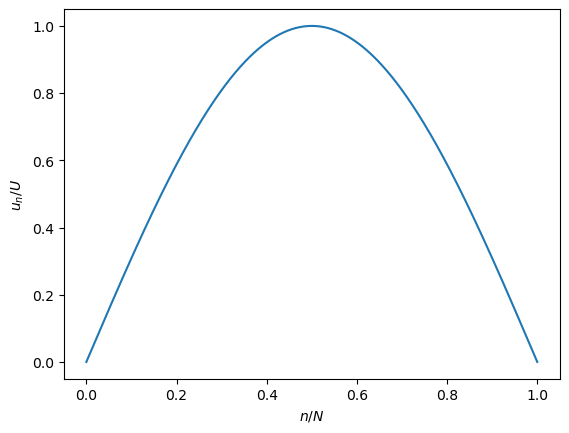

In [5]:
plt.plot(n/N, u/U)
plt.xlabel('$n/N$')
plt.ylabel('$u_n/U$')
plt.show()

Les conditions limites $u_0 = u_{N+1} = 0$ sont respectées

2) Ensuite, représentez les valeurs du facteur $|A|$ en fonction du paramètre $N \omega / \pi$, pour $N=1000$ et $\omega=[0, 20/N]$. Utilisez une échelle logarithmique pour l'échelle des ordonnées et 10000 valeurs de $\omega$. Vous devez obtenir un graphique similaire à celui ci-dessous. Que pouvez-vous en déduire visuellement sur les valeurs des pulsations de résonance? Vérifiez votre observation graphiquement. Que se passe-t-il quand on change le nombre de valeurs de $\omega$ et pourquoi?

![](./output.png)

In [6]:
def A_from_u(u, w, N):
    return 1/((2-w*w)*u[N]-u[N-1])

In [7]:
omegas = np.linspace(0, 20/N, N+1)
A = np.empty(omegas.shape)

for i, omega in enumerate(omegas):
    u = fill_u(omega, N)
    A[i] = A_from_u(u, omega, N)

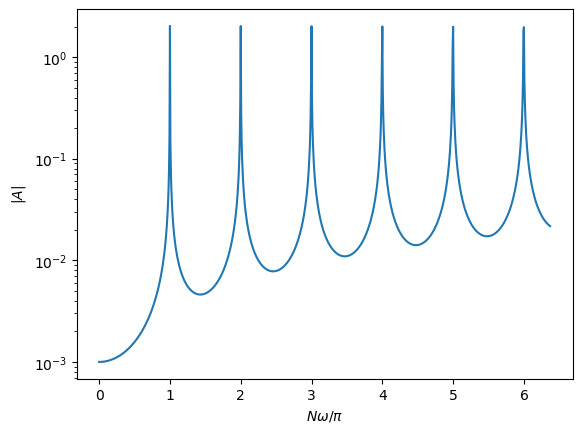

In [8]:
plt.plot(N*omegas/np.pi, np.fabs(A))
plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.show()

Les valeurs des pulsations des résonnances sont équiréparties. On les atteint pour des valeurs entières de $N \omega/\pi$ ie pour des $\omega = k \pi/N$ avec $k \in \mathbb R^\star$. Avec un plus grand nombre de $\omega$, on a des pics qui deviennent plus grand... car pour $N$ grand, on a plus de chance de tomber sur une valeur de la pulsation à la résonnance.

3) Représentez sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$ pour les 4 premières valeurs des pulsations de résonance. Que pouvez-vous observer? Montrer graphiquement que les valeurs des éléments de la suite peuvent être représentés par un modèle sinusoïdal qui correspond à la pulsation de résonance, c'est-à-dire $v_n=\sin(\omega_r n)$.

In [9]:
# 4 premières valeurs de la pulsation de résonance
w = np.linspace(1, 4, 4)*np.pi/N
u = []; U = []
for W in w:
    u_ = fill_u(W, N)
    u.append(u_)
    U.append(np.max(u_))

n = np.linspace(0, N, N+1)

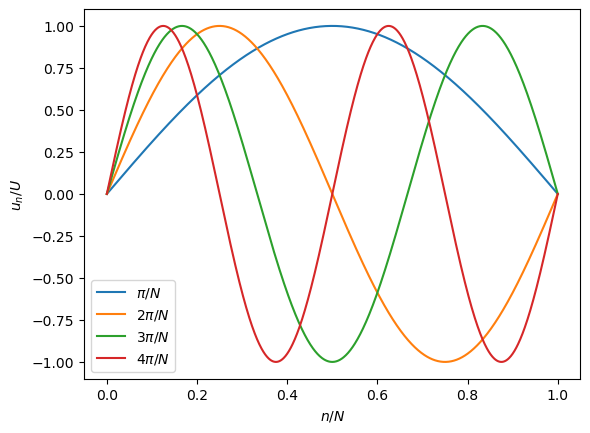

In [10]:
for i in range(4):
    plt.plot(n/N, u[i]/U[i])
plt.xlabel('$n/N$')
plt.ylabel('$u_n/U$')
plt.legend(['$\pi/N$', '$2\pi/N$', '$3\pi/N$', '$4\pi/N$'], loc="lower left")
plt.show()

Cela correspond bien à un modèle sinusoïdale... qui vaut 0 en 0 et $\pi$

4) Les caractéristiques de la résonance changent elles lorsque vous faites varier le nombre N de masses et de ressort ? Vous pouvez comparer vos résultats pour $N=50, 1000, 10000$.

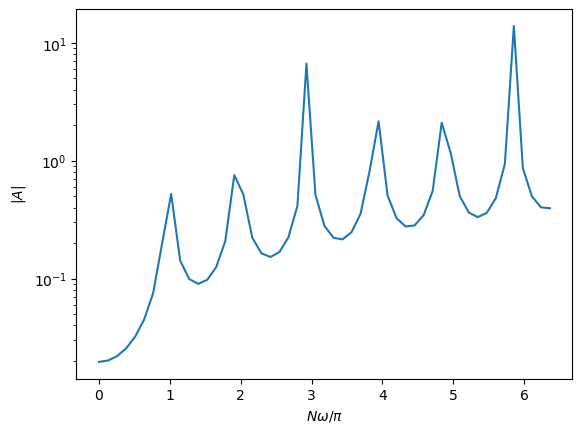

In [11]:
N = 50
omegas = np.linspace(0, 20/N, N+1)
A = np.empty(omegas.shape)

for i, omega in enumerate(omegas):
    u = fill_u(omega, N)
    A[i] = A_from_u(u, omega, N)

plt.plot(N*omegas/np.pi, np.fabs(A))
plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.show()

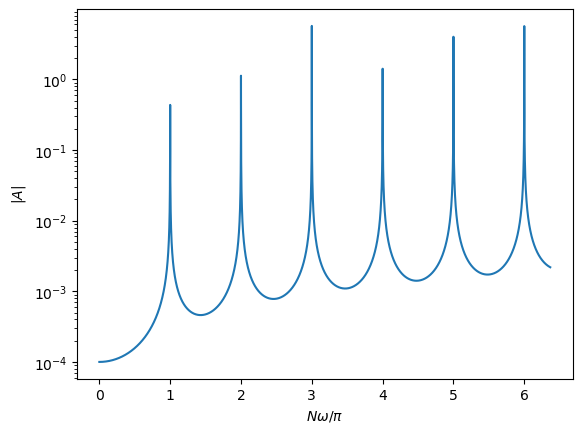

In [12]:
N = 10000
omegas = np.linspace(0, 20/N, N+1)
A = np.empty(omegas.shape)

for i, omega in enumerate(omegas):
    u = fill_u(omega, N)
    A[i] = A_from_u(u, omega, N)

plt.plot(N*omegas/np.pi, np.fabs(A))
plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.show()

En augmentant le nombre de point, on a plus de chance de se rapprocher d'une pulsation de résonnance

### Partie II

Les masses de $0$ à $N/2$ valent maintenant $m'=rm$. La suite d'éléments $u_n$ est donnée par $$u_0=0 \ \ \ , \ \ \ u_1=1 \ \ \ , \ \ \ u_n=(2-r\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n\le N/2 \ \ \ ,$$ $$u_n=(2-\omega^2)u_{n-1}-u_{n-2} \ \ \ \mathrm{pour} \ \ \ n > N/2 \ \ \ .$$
Le facteur $A$ est toujours donné par la même expression. On utilisera $N=1000$ pour toute cette partie.

5) Représentez sur un même graphique l'amplitude $|A|$ en fonction du paramètre $N \omega / \pi$ pour $\omega=[0,4/N]$, et $r=1,2,3,4,5$. On utilisera 10000 valeurs de la pulsation $\omega$ et une échelle logarithmique pour l'axe des ordonnées. Que pouvez-vous constater qualitativement en comparant les pulsations de résonance pour les différentes valeurs de $r$?

In [13]:
def compute_u_with_r(w, r, u2, u1):
    """
    u1 is u[n-1]
    u2 is u[n-2]
    then return u[n]
    """
    return (2-r*w*w)*u1-u2

In [14]:
def new_fill_u(w, r, N):
    u = np.empty([N+1])
    u[0] = 0
    u[1] = 1
    for i in range(N//2-1):
        u[i+2] = compute_u_with_r(w, r, u[i], u[i+1])
    for i in range(N//2-1, N-1):
        u[i+2] = compute_u(w, u[i], u[i+1])

    return u

In [15]:
N = 1000
omegas = np.linspace(0, 4/N, N+1)

A_r = []

for r in range(5):
    A = np.empty(omegas.shape)
    for i, omega in enumerate(omegas):
        u = new_fill_u(omega, r+1, N)
        A[i] = A_from_u(u, omega, N)
    A_r.append(np.fabs(A))

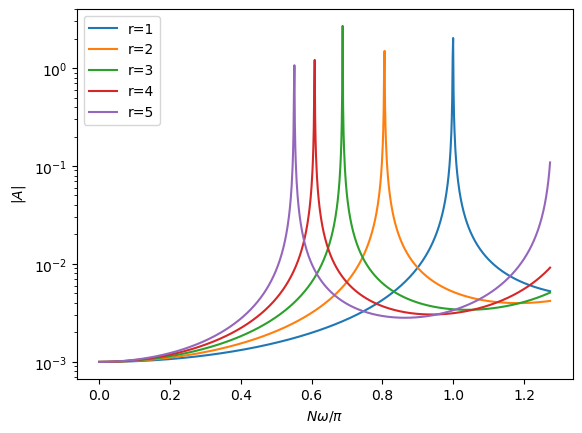

In [16]:
for r in range(5):
    plt.plot(N*omegas/np.pi, np.fabs(A_r[r]))

plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.legend(['r=1', 'r=2', 'r=3', 'r=4', 'r=5'], loc="upper left")
plt.show()

6) Trouver numériquement la valeur de la première pulsation de résonance $\omega_1$ pour $r=1,2,3,4,5$. Pour cela, vous pourrez utiliser la fonction ```find_peaks()``` du module ```scipy.signal``` (voir en annexe comment utiliser cette fonction). Votre observation qualitative de la question précédente est-elle vérifiée?

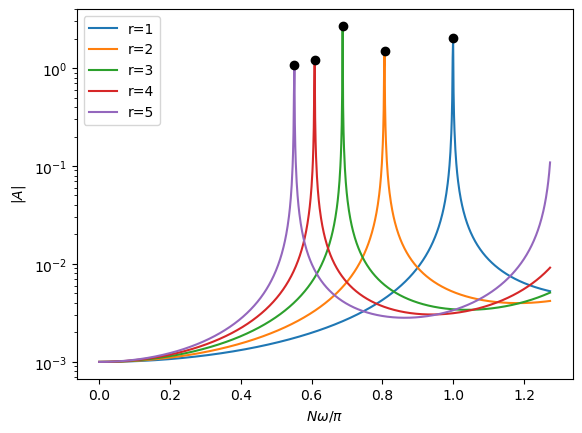

In [17]:
from scipy.signal import find_peaks

for r in range(5):
    plt.plot(N*omegas/np.pi, A_r[r])

peaks_r = []

for r in range(5):
    peaks, _ = find_peaks(A_r[r])
    the_peak = peaks[0]
    peaks_r.append(the_peak)

for r in range(5):
    plt.plot(N*omegas[peaks_r[r]]/np.pi, A_r[r][peaks_r[r]], 'k o')

plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.legend(['r=1', 'r=2', 'r=3', 'r=4', 'r=5'], loc="upper left")
plt.show()

7) Comparer sur un même graphique les valeurs des éléments de la suite $u_n/U$ en fonction de $n/N$, pour la première pulsation de résonance $\omega=\omega_1$ et pour les différentes valeurs de $r$ considérées. Que constatez-vous?

In [18]:
r_ = [0, 1, 2, 3, 4]
omega1 = [omegas[peaks_r[r]] for r in r_]

u = []; U = []
for r, W in zip(r_, omega1):
    u_ = new_fill_u(W, r+1, N)
    u.append(u_)
    U.append(np.max(u_))

n = np.linspace(0, N, N+1)

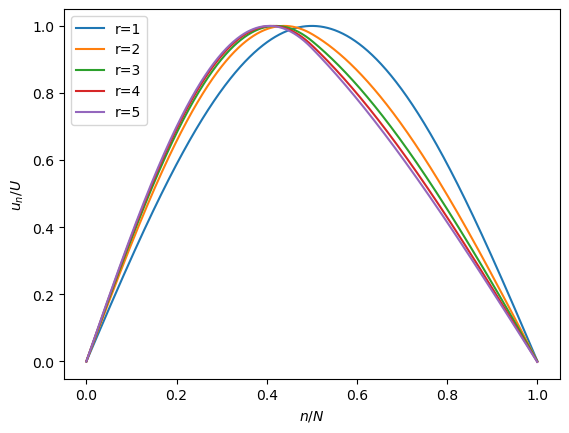

In [19]:
for r in range(5):
    plt.plot(n/N, u[r]/U[r])

plt.xlabel('$n/N$')
plt.ylabel('$u_n/U$')
plt.legend(['r=1', 'r=2', 'r=3', 'r=4', 'r=5'], loc="upper left")
plt.show()

Le max de $u_n/U$ diminue lorsque $r$ augmente

8) Représentez graphiquement $\omega_1$ en fonction de $r$ pour $r$ variant de $1$ à $100$, en utilisant des échelles logarithmiques pour les deux axes. On peut montrer que $\omega_1 \simeq (4.06/N\sqrt{r})$ pour $N$ et $r$ assez grands. Vérifiez vous cette relation?

In [20]:
A_r = []

for r in range(100):
    A = np.empty(omegas.shape)
    for i, omega in enumerate(omegas):
        u = new_fill_u(omega, r+1, N)
        A[i] = A_from_u(u, omega, N)
    A_r.append(np.fabs(A))

In [21]:
peaks_r = []

for r in range(100):
    peaks, _ = find_peaks(A_r[r])
    the_peak = peaks[0]
    peaks_r.append(the_peak)

In [22]:
r_ = np.linspace(0,99,100).astype(int)
omega1 = [omegas[peaks_r[r]] for r in r_]

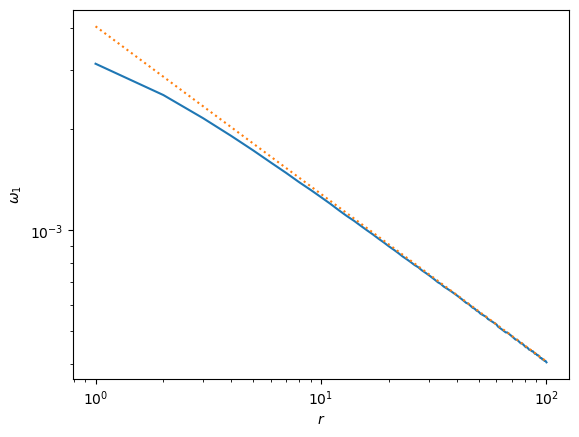

In [23]:
plt.plot(r_+1, omega1)
plt.plot(r_+1, 4.06/(N*np.sqrt(r_+1)), ':')

plt.xscale("log")
plt.yscale("log")
plt.xlabel('$r$')
plt.ylabel('$\omega_1$')
plt.show()

Oui !

## Annexe
### Utilisation de ```find_peak()```

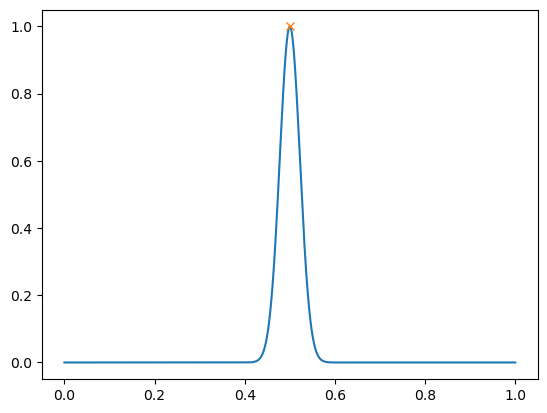

In [24]:
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,10000)
y = np.exp(-(x-0.5)**2/1e-3)

peaks, _ = find_peaks(y)

plt.plot(x, y)
plt.plot(x[peaks], y[peaks], "x")

In [25]:
def fill_u_with_r(w, r, N):
    u = np.empty([N+1])
    u[0] = 0
    u[1] = 1
    for i in range(N-1):
        if i < N/2-1:
            u[i+2] = compute_u_with_r(w, r, u[i], u[i+1])
        else:
            u[i+2] = compute_u(w, u[i], u[i+1])

    return u

In [26]:
N = 1000
omegas = np.linspace(0, 4/N, N+1)

A = [np.empty(omegas.shape)]*5

for r in range(5):
    for i, omega in enumerate(omegas):
        u = new_fill_u(omega, r+1, N)
        A[r][i] = A_from_u(u, omega, N)

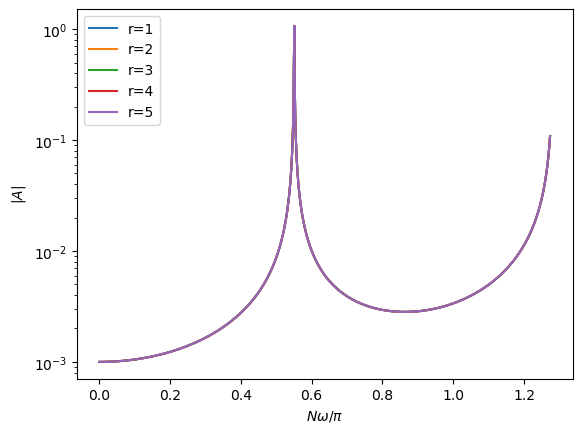

In [28]:
for r in range(5):
    plt.plot(N*omegas/np.pi, np.fabs(A[r]))

plt.yscale("log")
plt.xlabel('$N \omega/\pi$')
plt.ylabel('$|A|$')
plt.legend(['r=1', 'r=2', 'r=3', 'r=4', 'r=5'], loc="upper left")
plt.show()